Вариант 1)
1. Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .
​
2. Оцените ошибку модели из п.1 .
3. Сделайте вывод о том, как изменилась ошибка модели по значениям h.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0, 1], parse_dates=[0])

data.head()

PJME_MW  year  month  dayofmonth  quarter  dayofyear  \
Date       Time                                                             
2002-01-01 01:00:00  30393.0  2002      1           1        1          1   
           02:00:00  29265.0  2002      1           1        1          1   
           03:00:00  28357.0  2002      1           1        1          1   
           04:00:00  27899.0  2002      1           1        1          1   
           05:00:00  28057.0  2002      1           1        1          1   

                     weekofyear  dayofweek  hour  is_holiday  is_prev_holiday  \
Date       Time                                                                 
2002-01-01 01:00:00           1          1     1           1                0   
           02:00:00           1          1     2           1                0   
           03:00:00           1          1     3           1                0   
           04:00:00           1          1     4           1                0   
           05:00:00           1          1     5           1                0   

                     is_next_holiday  
Date       Time                       
2002-01-01 01:00:00                0  
           02:00:00                0  
           03:00:00                0  
           04:00:00                0  
           05:00:00                0

применим экспоненциальное сглаживание

In [3]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [4]:
data_exp = data.copy()

data_exp['PJME_MW'] = exponential_smoothing(data['PJME_MW']  , 0.05)


сравним графики до и после сглаживания

Text(0.5, 1.0, 'PJME_MW')

C:\Users\horne\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


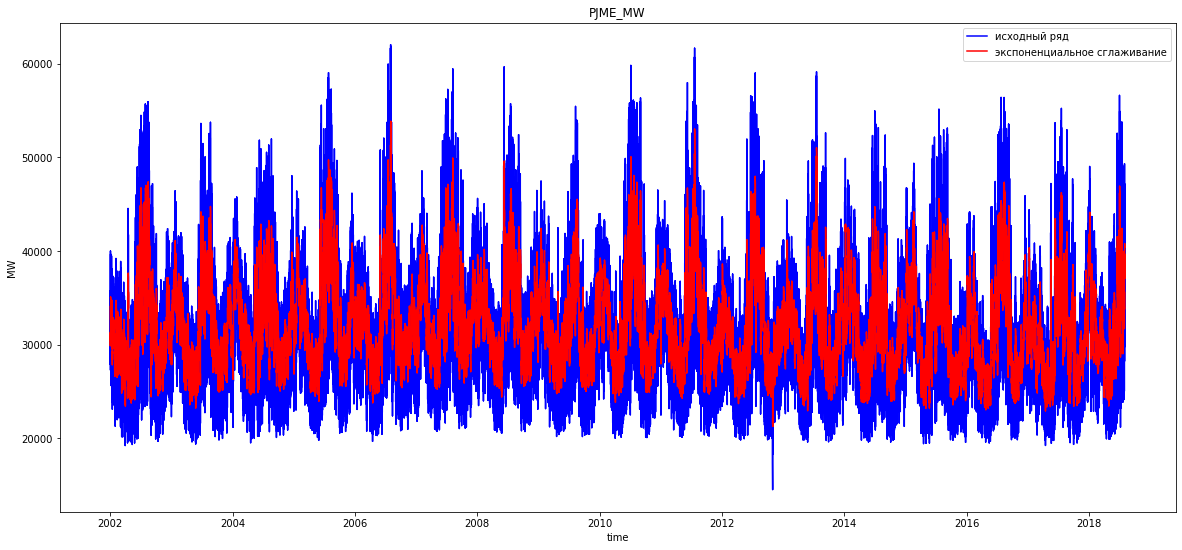

In [5]:
plt.figure(figsize=(20, 9))

plt.plot(data.index.get_level_values('Date'), data['PJME_MW'], color = 'blue',label='исходный ряд')

plt.plot(data_exp.index.get_level_values('Date'), data_exp['PJME_MW'], color = 'red', label="экспоненциальное сглаживание");

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

Теперь добавим новую фичу - глубину прогноза. Сделаем датафрейм с глубиной h = 1 и второй с глубиной h = 10

In [6]:
data_exp_h1 = data_exp.copy()
data_exp_h1['h1'] = 0
data_exp_h1.iloc[1:,12] = data_exp_h1.iloc[:-1,0].values
data_exp_h1.head()


PJME_MW  year  month  dayofmonth  quarter  dayofyear  \
Date       Time                                                                 
2002-01-01 01:00:00  30393.00000  2002      1           1        1          1   
           02:00:00  30336.60000  2002      1           1        1          1   
           03:00:00  30237.62000  2002      1           1        1          1   
           04:00:00  30120.68900  2002      1           1        1          1   
           05:00:00  30017.50455  2002      1           1        1          1   

                     weekofyear  dayofweek  hour  is_holiday  is_prev_holiday  \
Date       Time                                                                 
2002-01-01 01:00:00           1          1     1           1                0   
           02:00:00           1          1     2           1                0   
           03:00:00           1          1     3           1                0   
           04:00:00           1          1     4           1                0   
           05:00:00           1          1     5           1                0   

                     is_next_holiday         h1  
Date       Time                                  
2002-01-01 01:00:00                0      0.000  
           02:00:00                0  30393.000  
           03:00:00                0  30336.600  
           04:00:00                0  30237.620  
           05:00:00                0  30120.689

In [7]:
data_exp_h10 = data_exp_h1.copy()
data_exp_h10['h2'] = 0
data_exp_h10.iloc[2:,13] = data_exp_h10.iloc[:-2,0].values
data_exp_h10['h3'] = 0
data_exp_h10.iloc[3:,14] = data_exp_h10.iloc[:-3,0].values
data_exp_h10['h4'] = 0
data_exp_h10.iloc[4:,15] = data_exp_h10.iloc[:-4,0].values
data_exp_h10['h5'] = 0
data_exp_h10.iloc[5:,16] = data_exp_h10.iloc[:-5,0].values
data_exp_h10['h6'] = 0
data_exp_h10.iloc[6:,17] = data_exp_h10.iloc[:-6,0].values
data_exp_h10['h7'] = 0
data_exp_h10.iloc[7:,18] = data_exp_h10.iloc[:-7,0].values
data_exp_h10['h8'] = 0
data_exp_h10.iloc[8:,19] = data_exp_h10.iloc[:-8,0].values
data_exp_h10['h9'] = 0
data_exp_h10.iloc[9:,20] = data_exp_h10.iloc[:-9,0].values
data_exp_h10['h10'] = 0
data_exp_h10.iloc[10:,21] = data_exp_h10.iloc[:-10,0].values

data_exp_h10.head(11)

PJME_MW  year  month  dayofmonth  quarter  \
Date       Time                                                       
2002-01-01 01:00:00  30393.000000  2002      1           1        1   
           02:00:00  30336.600000  2002      1           1        1   
           03:00:00  30237.620000  2002      1           1        1   
           04:00:00  30120.689000  2002      1           1        1   
           05:00:00  30017.504550  2002      1           1        1   
           06:00:00  29949.329322  2002      1           1        1   
           07:00:00  29917.262856  2002      1           1        1   
           08:00:00  29901.149714  2002      1           1        1   
           09:00:00  29903.242228  2002      1           1        1   
           10:00:00  29942.680116  2002      1           1        1   
           11:00:00  30015.296111  2002      1           1        1   

                     dayofyear  weekofyear  dayofweek  hour  is_holiday  ...  \
Date       Time                                                          ...   
2002-01-01 01:00:00          1           1          1     1           1  ...   
           02:00:00          1           1          1     2           1  ...   
           03:00:00          1           1          1     3           1  ...   
           04:00:00          1           1          1     4           1  ...   
           05:00:00          1           1          1     5           1  ...   
           06:00:00          1           1          1     6           1  ...   
           07:00:00          1           1          1     7           1  ...   
           08:00:00          1           1          1     8           1  ...   
           09:00:00          1           1          1     9           1  ...   
           10:00:00          1           1          1    10           1  ...   
           11:00:00          1           1          1    11           1  ...   

                               h1            h2            h3            h4  \
Date       Time                                                               
2002-01-01 01:00:00      0.000000      0.000000      0.000000      0.000000   
           02:00:00  30393.000000      0.000000      0.000000      0.000000   
           03:00:00  30336.600000  30393.000000      0.000000      0.000000   
           04:00:00  30237.620000  30336.600000  30393.000000      0.000000   
           05:00:00  30120.689000  30237.620000  30336.600000  30393.000000   
           06:00:00  30017.504550  30120.689000  30237.620000  30336.600000   
           07:00:00  29949.329322  30017.504550  30120.689000  30237.620000   
           08:00:00  29917.262856  29949.329322  30017.504550  30120.689000   
           09:00:00  29901.149714  29917.262856  29949.329322  30017.504550   
           10:00:00  29903.242228  29901.149714  29917.262856  29949.329322   
           11:00:00  29942.680116  29903.242228  29901.149714  29917.262856   

                               h5           h6         h7        h8       h9  \
Date       Time                                                                
2002-01-01 01:00:00      0.000000      0.00000      0.000      0.00      0.0   
           02:00:00      0.000000      0.00000      0.000      0.00      0.0   
           03:00:00      0.000000      0.00000      0.000      0.00      0.0   
           04:00:00      0.000000      0.00000      0.000      0.00      0.0   
           05:00:00      0.000000      0.00000      0.000      0.00      0.0   
           06:00:00  30393.000000      0.00000      0.000      0.00      0.0   
           07:00:00  30336.600000  30393.00000      0.000      0.00      0.0   
           08:00:00  30237.620000  30336.60000  30393.000      0.00      0.0   
           09:00:00  30120.689000  30237.62000  30336.600  30393.00      0.0   
           10:00:00  30017.504550  30120.68900  30237.620  30336.60  30393.0   
           11:00:00  29949.329322  30017.50455  30120.689  30237.62  3033

Теперь построим модели предсказания для обоих датафреймов. Первая - для h = 1

In [8]:
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

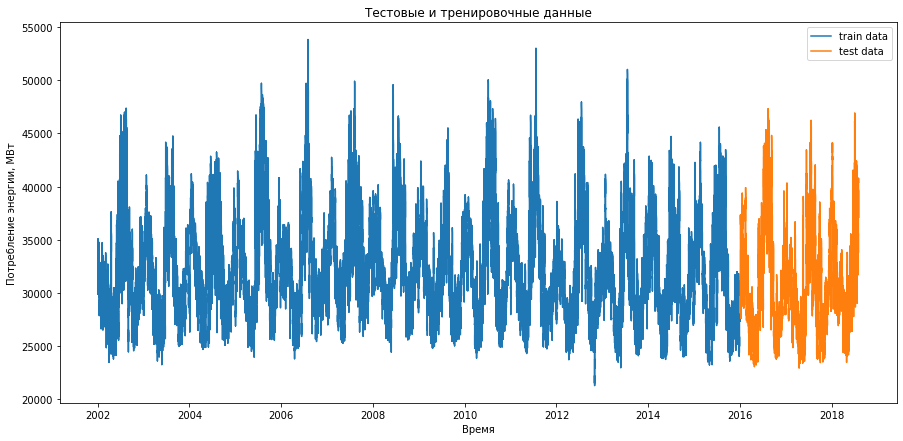

In [9]:
train, test = split_data(data_exp_h1, '01-01-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [10]:
train.head()

PJME_MW  year  month  dayofmonth  quarter  dayofyear  \
Date       Time                                                                 
2002-01-01 01:00:00  30393.00000  2002      1           1        1          1   
           02:00:00  30336.60000  2002      1           1        1          1   
           03:00:00  30237.62000  2002      1           1        1          1   
           04:00:00  30120.68900  2002      1           1        1          1   
           05:00:00  30017.50455  2002      1           1        1          1   

                     weekofyear  dayofweek  hour  is_holiday  is_prev_holiday  \
Date       Time                                                                 
2002-01-01 01:00:00           1          1     1           1                0   
           02:00:00           1          1     2           1                0   
           03:00:00           1          1     3           1                0   
           04:00:00           1          1     4           1                0   
           05:00:00           1          1     5           1                0   

                     is_next_holiday         h1  
Date       Time                                  
2002-01-01 01:00:00                0      0.000  
           02:00:00                0  30393.000  
           03:00:00                0  30336.600  
           04:00:00                0  30237.620  
           05:00:00                0  30120.689

In [11]:
X_train = train.iloc[:-1,:]
y_train = train['PJME_MW'].values[1:]
X_test = test.iloc[:-1,:]
y_test = test['PJME_MW'].values[1:]
X_train.drop( columns = 'PJME_MW', inplace = True )
X_test.drop( columns = 'PJME_MW', inplace = True )

C:\Users\horne\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=24, n_estimators=100)

In [14]:
model_g.fit( X_train, y_train )


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=24, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
X_test_pred_g = model_g.predict(X_test)

In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


er_g_h1 = mean_absolute_percentage_error(y_true=y_test, y_pred=X_test_pred_g)
er_g_h1

0.47490764278419345

Вторая - для h = 10

In [19]:
train, test = split_data(data_exp_h10, '01-01-2016')
train.head()

PJME_MW  year  month  dayofmonth  quarter  dayofyear  \
Date       Time                                                                 
2002-01-01 01:00:00  30393.00000  2002      1           1        1          1   
           02:00:00  30336.60000  2002      1           1        1          1   
           03:00:00  30237.62000  2002      1           1        1          1   
           04:00:00  30120.68900  2002      1           1        1          1   
           05:00:00  30017.50455  2002      1           1        1          1   

                     weekofyear  dayofweek  hour  is_holiday  ...         h1  \
Date       Time                                               ...              
2002-01-01 01:00:00           1          1     1           1  ...      0.000   
           02:00:00           1          1     2           1  ...  30393.000   
           03:00:00           1          1     3           1  ...  30336.600   
           04:00:00           1          1     4           1  ...  30237.620   
           05:00:00           1          1     5           1  ...  30120.689   

                           h2       h3       h4   h5   h6   h7   h8   h9  h10  
Date       Time                                                                
2002-01-01 01:00:00      0.00      0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
           02:00:00      0.00      0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
           03:00:00  30393.00      0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
           04:00:00  30336.60  30393.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
           05:00:00  30237.62  30336.6  30393.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 22 columns]

In [20]:
X_train = train.iloc[:-1,:]
y_train = train['PJME_MW'].values[1:]
X_test = test.iloc[:-1,:]
y_test = test['PJME_MW'].values[1:]
X_train.drop( columns = 'PJME_MW', inplace = True )
X_test.drop( columns = 'PJME_MW', inplace = True )

C:\Users\horne\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
model_g.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=24, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
X_test_pred_g = model_g.predict(X_test)

In [23]:
er_g_h10 = mean_absolute_percentage_error(y_true=y_test, y_pred=X_test_pred_g)
er_g_h10

0.4309759773406608

In [24]:
print('ошибка модели h=1 : {0}, ошибка модели h=10 : {1}'.format(er_g_h1, er_g_h10))

ошибка модели h=1 : 0.47490764278419345, ошибка модели h=10 : 0.4309759773406608


Выводы: экспоненциальное сглаживание и добавление глубины h=1 уже значительно улучшили качество предсказания модели (по сравнению с моделью из прошлого уроке без сглаживания и глубины в 20 раз (если с метрикой не ошибся)). Добавление глубины h=10 увеличило точность модели не так значительно - в абсолютной величине на 0,04%.

Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):
​
а) Изменение температуры за окном :).
​
б) Количество денег, которые тратят покупатели в интернет магазине.
​
в) Вес растущего котенка.
​
г) Прирост объема деревьев в лесу от времени

*а) - нестационарный, с сезонами (лето-зима) и циклами (день-ночь)*  
*б) - нестационарный, с сезонами (обычные сезоны покупательской активности - сильный спад с мая по август, сильный подьем в декабре и т.п.)*  
*в) - нестационарный, с повышающимся трендом (котенок все время растет и постепенно набирает вес)*  
*г) - скорее всего стационарный, без доп. признаков величина не будет показывать зависимости от времени*  